In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Uploading file
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [3]:
description_df=pd.read_excel('EastWestAirlines.xlsx',sheet_name=0) # Description file
description_df.head() # Displays the first few rows of the dataframe

East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0  flying patterns, earning and use of frequent f...                                      
1  card.  The task is to identify customer segmen...                                      
2                                                NaN                                      
3                                                NaN                                      
4  Source: Based upon real business data; company...                                      

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN

In [4]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name=1) # Data sheet

In [5]:
df.head() # Displays the first few rows of th edataframe

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [6]:
df.tail() # Displays the last few rows of the dataframe

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0

In [7]:
df.shape # Displays the shape of the dataframe

(3999, 12)

In [8]:
df.size # Displays the size of the dataframe

47988

In [9]:
df.info() # Displays the information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [10]:
df.isnull().sum() # Missing values

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [11]:
df.duplicated().sum() # Duplicated values

0

In [12]:
df.describe() # Displays the statistical values

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

array([[<Axes: title={'center': 'ID#'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'Qual_miles'}>],
       [<Axes: title={'center': 'cc1_miles'}>,
        <Axes: title={'center': 'cc2_miles'}>,
        <Axes: title={'center': 'cc3_miles'}>],
       [<Axes: title={'center': 'Bonus_miles'}>,
        <Axes: title={'center': 'Bonus_trans'}>,
        <Axes: title={'center': 'Flight_miles_12mo'}>],
       [<Axes: title={'center': 'Flight_trans_12'}>,
        <Axes: title={'center': 'Days_since_enroll'}>,
        <Axes: title={'center': 'Award?'}>]], dtype=object)

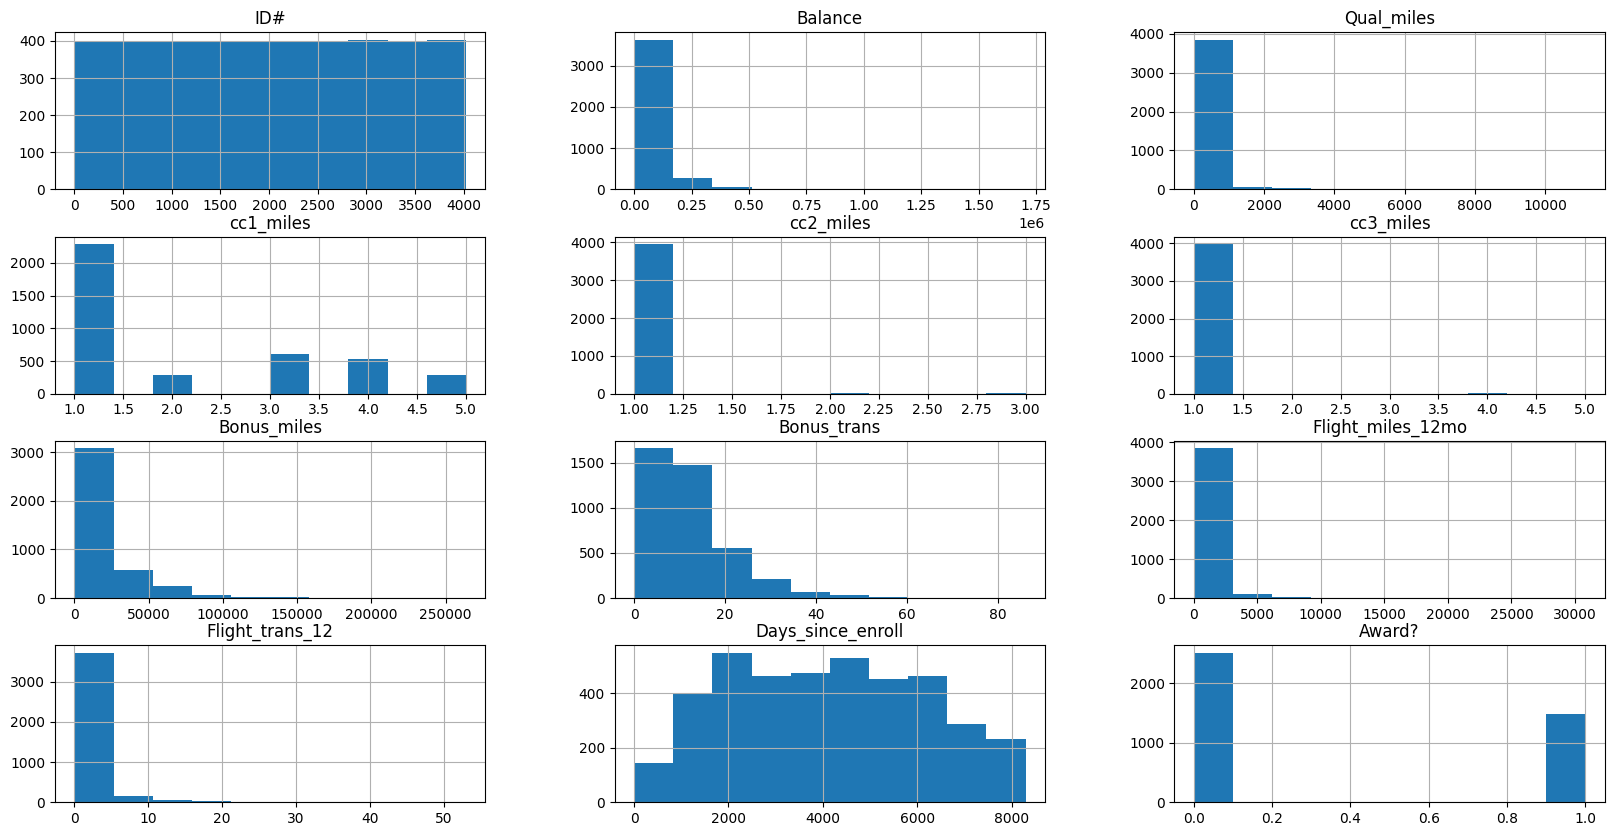

In [13]:
# plots histogram
df.hist(figsize=(20,10))

<Axes: xlabel='ID#', ylabel='Flight_miles_12mo'>

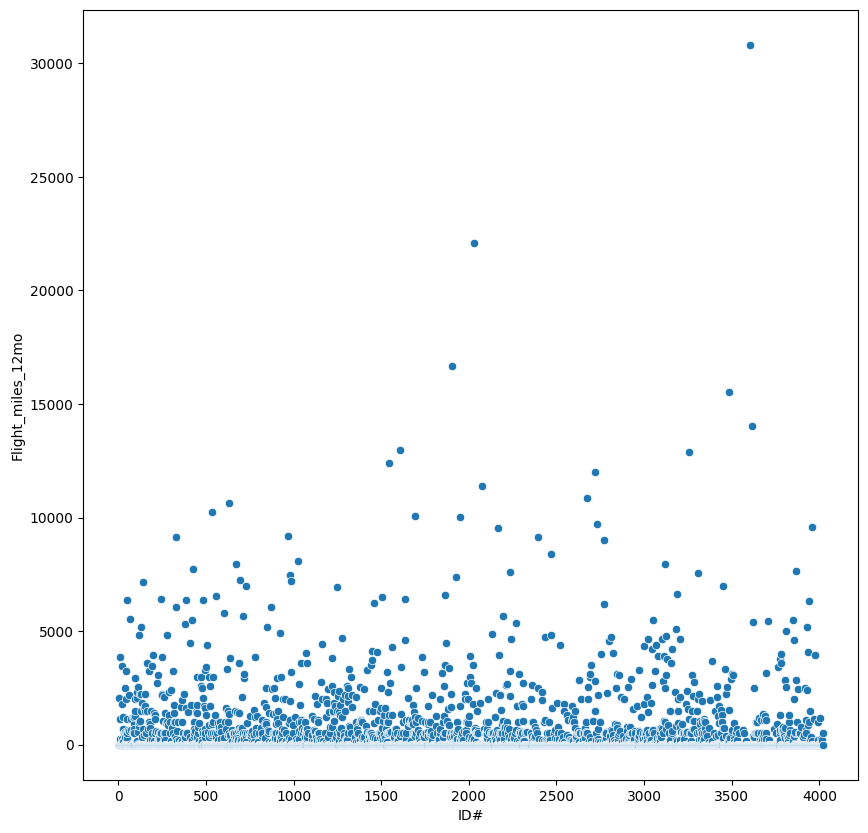

In [14]:
# plots scatterplot
plt.figure(figsize=(10,10))
sns.scatterplot(x='ID#',y='Flight_miles_12mo',data=df)

<Axes: xlabel='Bonus_trans', ylabel='Bonus_miles'>

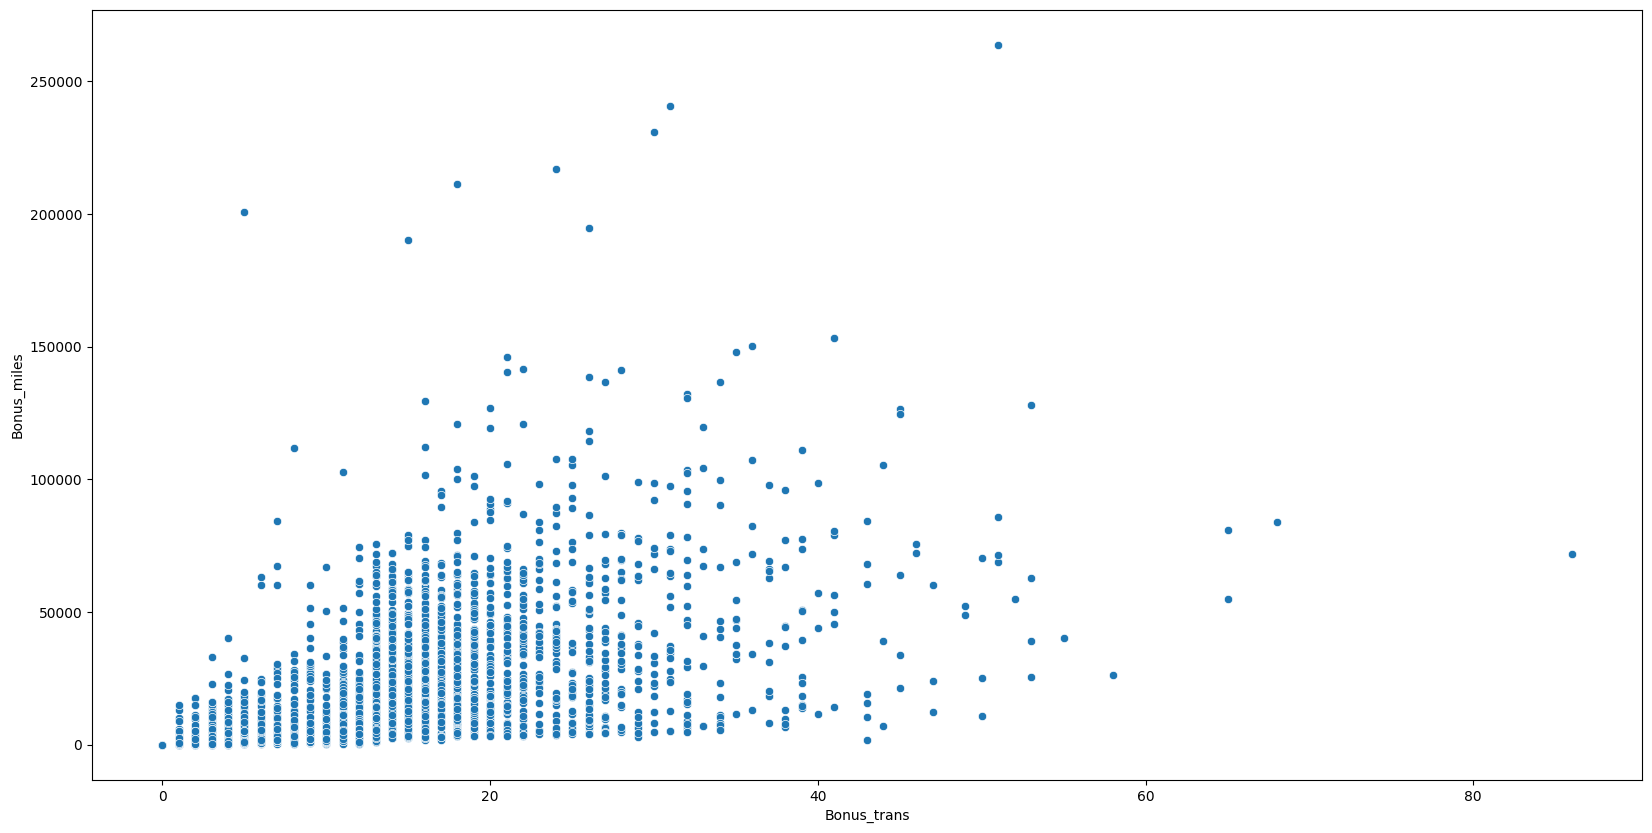

In [15]:
# plots scatterplot
plt.figure(figsize=(20,10))
sns.scatterplot(x='Bonus_trans',y='Bonus_miles',data=df)

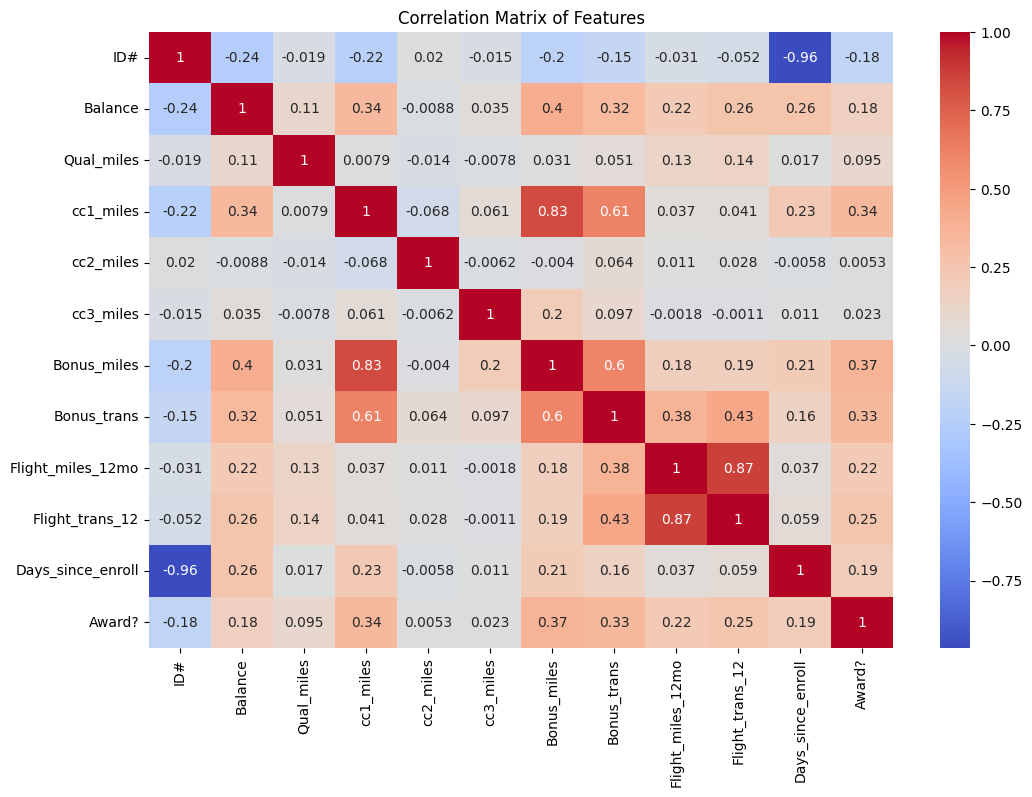

In [16]:
# plots heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # Correlation of df
plt.title("Correlation Matrix of Features")
plt.show()

<Axes: >

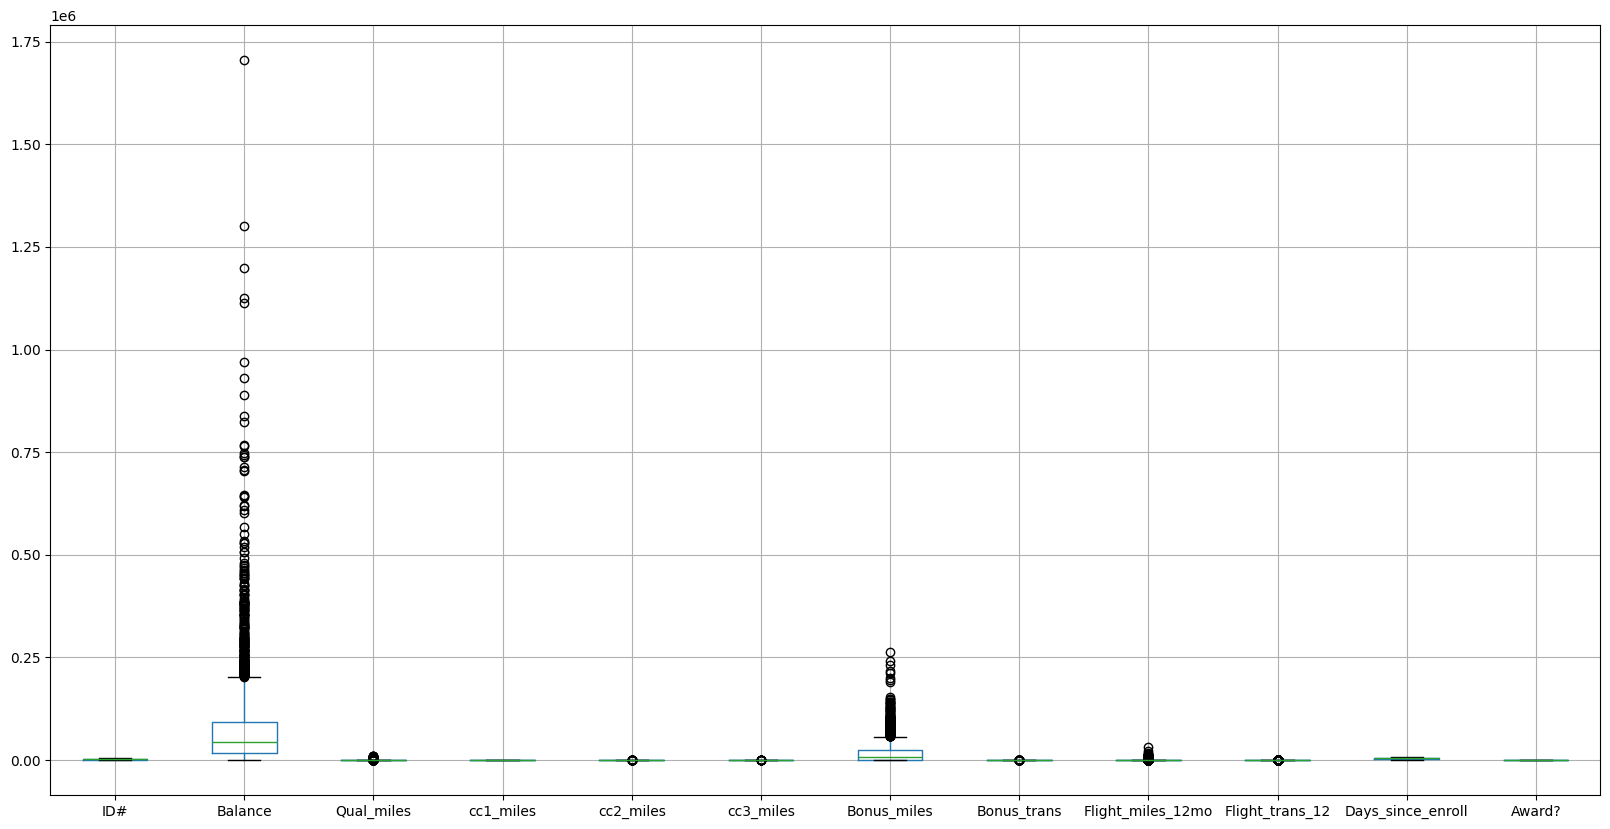

In [17]:
# plots boxplot
df.boxplot(figsize=(20,10))

In [18]:
# Outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Apply outlier handling to all numerical columns except ID#
columns_to_process = df.columns[1:]  # Exclude ID#
for column in columns_to_process:
    handle_outliers(df, column)

<Axes: >

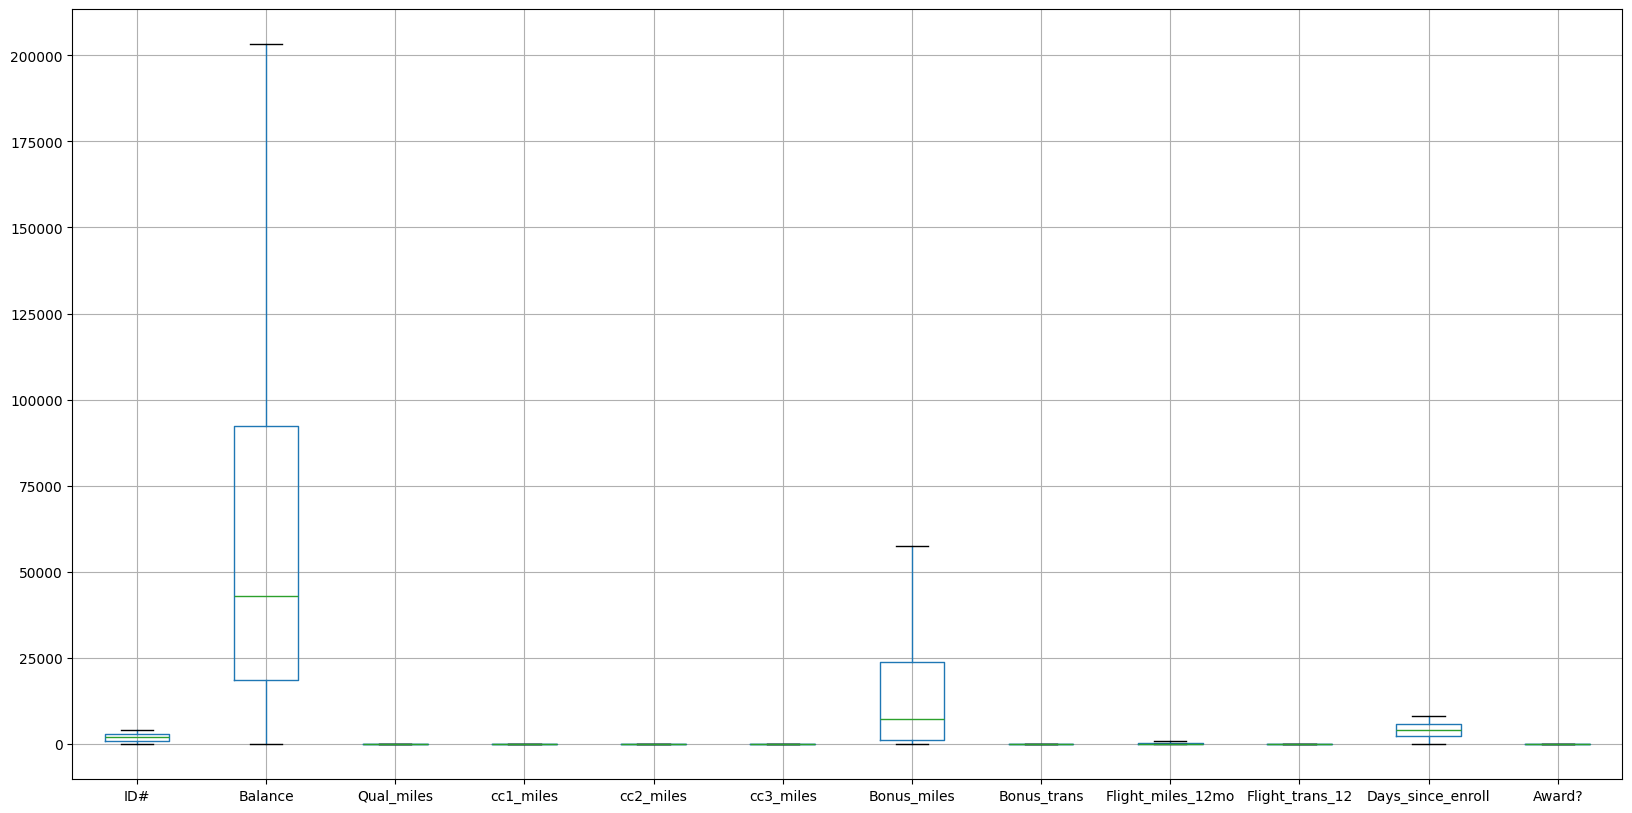

In [19]:
df.boxplot(figsize=(20,10))

In [20]:
# Applying scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[columns_to_process])
df1 = pd.DataFrame(scaled_features, columns=columns_to_process)

# Add back the ID column for reference
df1.insert(0, "ID#", df["ID#"].values)
# Results of scaling
df1.describe()

ID#       Balance  Qual_miles     cc1_miles  cc2_miles  \
count  3999.000000  3.999000e+03      3999.0  3.999000e+03     3999.0   
mean   2014.819455 -5.685763e-17         0.0  1.705729e-16        0.0   
std    1160.764358  1.000125e+00         0.0  1.000125e+00        0.0   
min       1.000000 -1.086971e+00         0.0 -7.695784e-01        0.0   
25%    1010.500000 -7.711597e-01         0.0 -7.695784e-01        0.0   
50%    2016.000000 -3.523592e-01         0.0 -7.695784e-01        0.0   
75%    3020.500000  4.881053e-01         0.0  6.831212e-01        0.0   
max    4021.000000  2.377003e+00         0.0  2.135821e+00        0.0   

       cc3_miles   Bonus_miles   Bonus_trans  Flight_miles_12mo  \
count     3999.0  3.999000e+03  3.999000e+03       3.999000e+03   
mean         0.0 -2.842882e-17  2.842882e-17      -7.107204e-18   
std          0.0  1.000125e+00  1.000125e+00       1.000125e+00   
min          0.0 -8.527184e-01 -1.258576e+00      -6.043135e-01   
25%          0.0 -7.835524e-01 -9.294109e-01      -6.043135e-01   
50%          0.0 -4.559271e-01  5.808475e-02      -6.043135e-01   
75%          0.0  4.642292e-01  6.066935e-01       4.512077e-01   
max          0.0  2.335902e+00  2.910850e+00       2.034489e+00   

       Flight_trans_12  Days_since_enroll        Award?  
count     3.999000e+03       3.999000e+03  3.999000e+03  
mean      4.264322e-17       5.685763e-17  1.421441e-17  
std       1.000125e+00       1.000125e+00  1.000125e+00  
min      -6.261434e-01      -1.993611e+00 -7.669193e-01  
25%      -6.261434e-01      -8.661823e-01 -7.669193e-01  
50%      -6.261434e-01      -1.092530e-02 -7.669193e-01  
75%       4.323844e-01       8.097050e-01  1.303918e+00  
max       2.020176e+00       2.023095e+00  1.303918e+00

In [21]:
df1

ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0        1 -0.607258         0.0  -0.769578        0.0        0.0   
1        2 -0.758947         0.0  -0.769578        0.0        0.0   
2        3 -0.382070         0.0  -0.769578        0.0        0.0   
3        4 -0.835106         0.0  -0.769578        0.0        0.0   
4        5  0.579265         0.0   1.409471        0.0        0.0   
...    ...       ...         ...        ...        ...        ...   
3994  4017 -0.772038         0.0  -0.769578        0.0        0.0   
3995  4018  0.010506         0.0  -0.769578        0.0        0.0   
3996  4019  0.167530         0.0   0.683121        0.0        0.0   
3997  4020 -0.151188         0.0  -0.769578        0.0        0.0   
3998  4021 -1.035562         0.0  -0.769578        0.0        0.0   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0       -0.843091    -1.148854          -0.604313        -0.626143   
1       -0.840822    -1.039133          -0.604313        -0.626143   
2       -0.624581    -0.819689          -0.604313        -0.626143   
3       -0.825052    -1.148854          -0.604313        -0.626143   
4        1.543191     1.594189           2.034489         2.020176   
...           ...          ...                ...              ...   
3994    -0.381007    -0.819689           0.074478         0.432384   
3995    -0.798437    -0.709967          -0.604313        -0.626143   
3996     0.555335    -0.380802          -0.604313        -0.626143   
3997    -0.825052    -1.148854           1.092666         0.432384   
3998    -0.852718    -1.258576          -0.604313        -0.626143   

      Days_since_enroll    Award?  
0              1.395454 -0.766919  
1              1.379957 -0.766919  
2              1.411920 -0.766919  
3              1.372208 -0.766919  
4              1.363975  1.303918  
...                 ...       ...  
3994          -1.315120  1.303918  
3995          -1.318994  1.303918  
3996          -1.315604  1.303918  
3997          -1.316088 -0.766919  
3998          -1.317541 -0.766919  

[3999 rows x 12 columns]

In [22]:
features= df1.drop('ID#',axis=1) # Droping column 'ID#'

# K-Means


In [23]:
# Kmeans
kmeans=KMeans(n_clusters=3)
cluster=kmeans.fit(features)

In [24]:
np.unique(cluster.labels_)

array([0, 1, 2], dtype=int32)

In [25]:
df['Cluster']=cluster.labels_

In [26]:
df[df.Cluster==1]

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
6        7  84914.0           0          3          1          1     27482.00   
11      12  96522.0           0          5          1          1     57626.25   
15      16  28495.0           0          4          1          1     49442.00   
16      17  51890.0           0          4          1          1     48963.00   
18      19  91473.0           0          3          1          1     27408.00   
...    ...      ...         ...        ...        ...        ...          ...   
3978  4001  10071.0           0          2          1          1     27701.00   
3980  4003  28867.0           0          3          1          1     19169.00   
3985  4008  59017.0           0          4          1          1     34746.00   
3991  4014  39142.0           0          3          1          1     14981.00   
3996  4019  73597.0           0          3          1          1     25447.00   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
6              25                0.0              0.0               6994   
11             19                0.0              0.0               6924   
15             15                0.0              0.0               6912   
16             16                0.0              0.0               6910   
18             17                0.0              0.0               6903   
...           ...                ...              ...                ...   
3978           16                0.0              0.0               1421   
3980           28                0.0              0.0               1425   
3985           25                0.0              0.0               1418   
3991           28                0.0              0.0               1408   
3996            8                0.0              0.0               1402   

      Award?  Cluster  
6          0        1  
11         1        1  
15         1        1  
16         1        1  
18         1        1  
...      ...      ...  
3978       1        1  
3980       0        1  
3985       0        1  
3991       0        1  
3996       1        1  

[1089 rows x 13 columns]

<Axes: xlabel='ID#', ylabel='Flight_miles_12mo'>

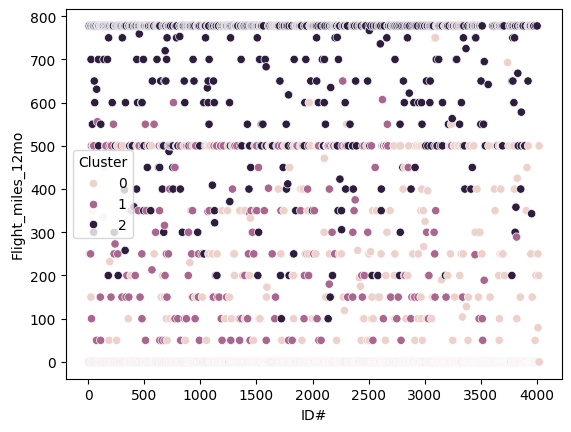

In [27]:
sns.scatterplot(data=df,x='ID#',y='Flight_miles_12mo',hue='Cluster')

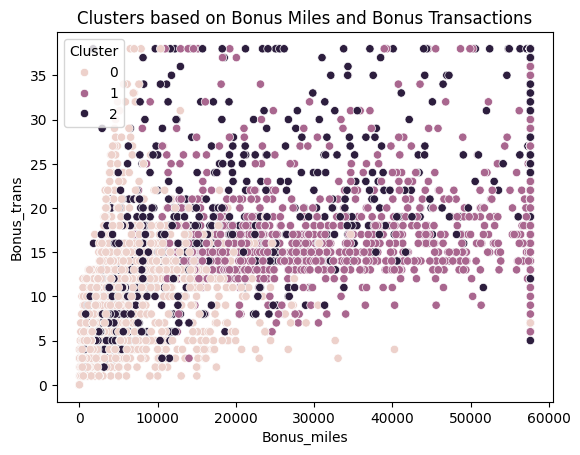

In [28]:
sns.scatterplot(data=df, x='Bonus_miles', y='Bonus_trans', hue='Cluster')
plt.title('Clusters based on Bonus Miles and Bonus Transactions')
plt.show()

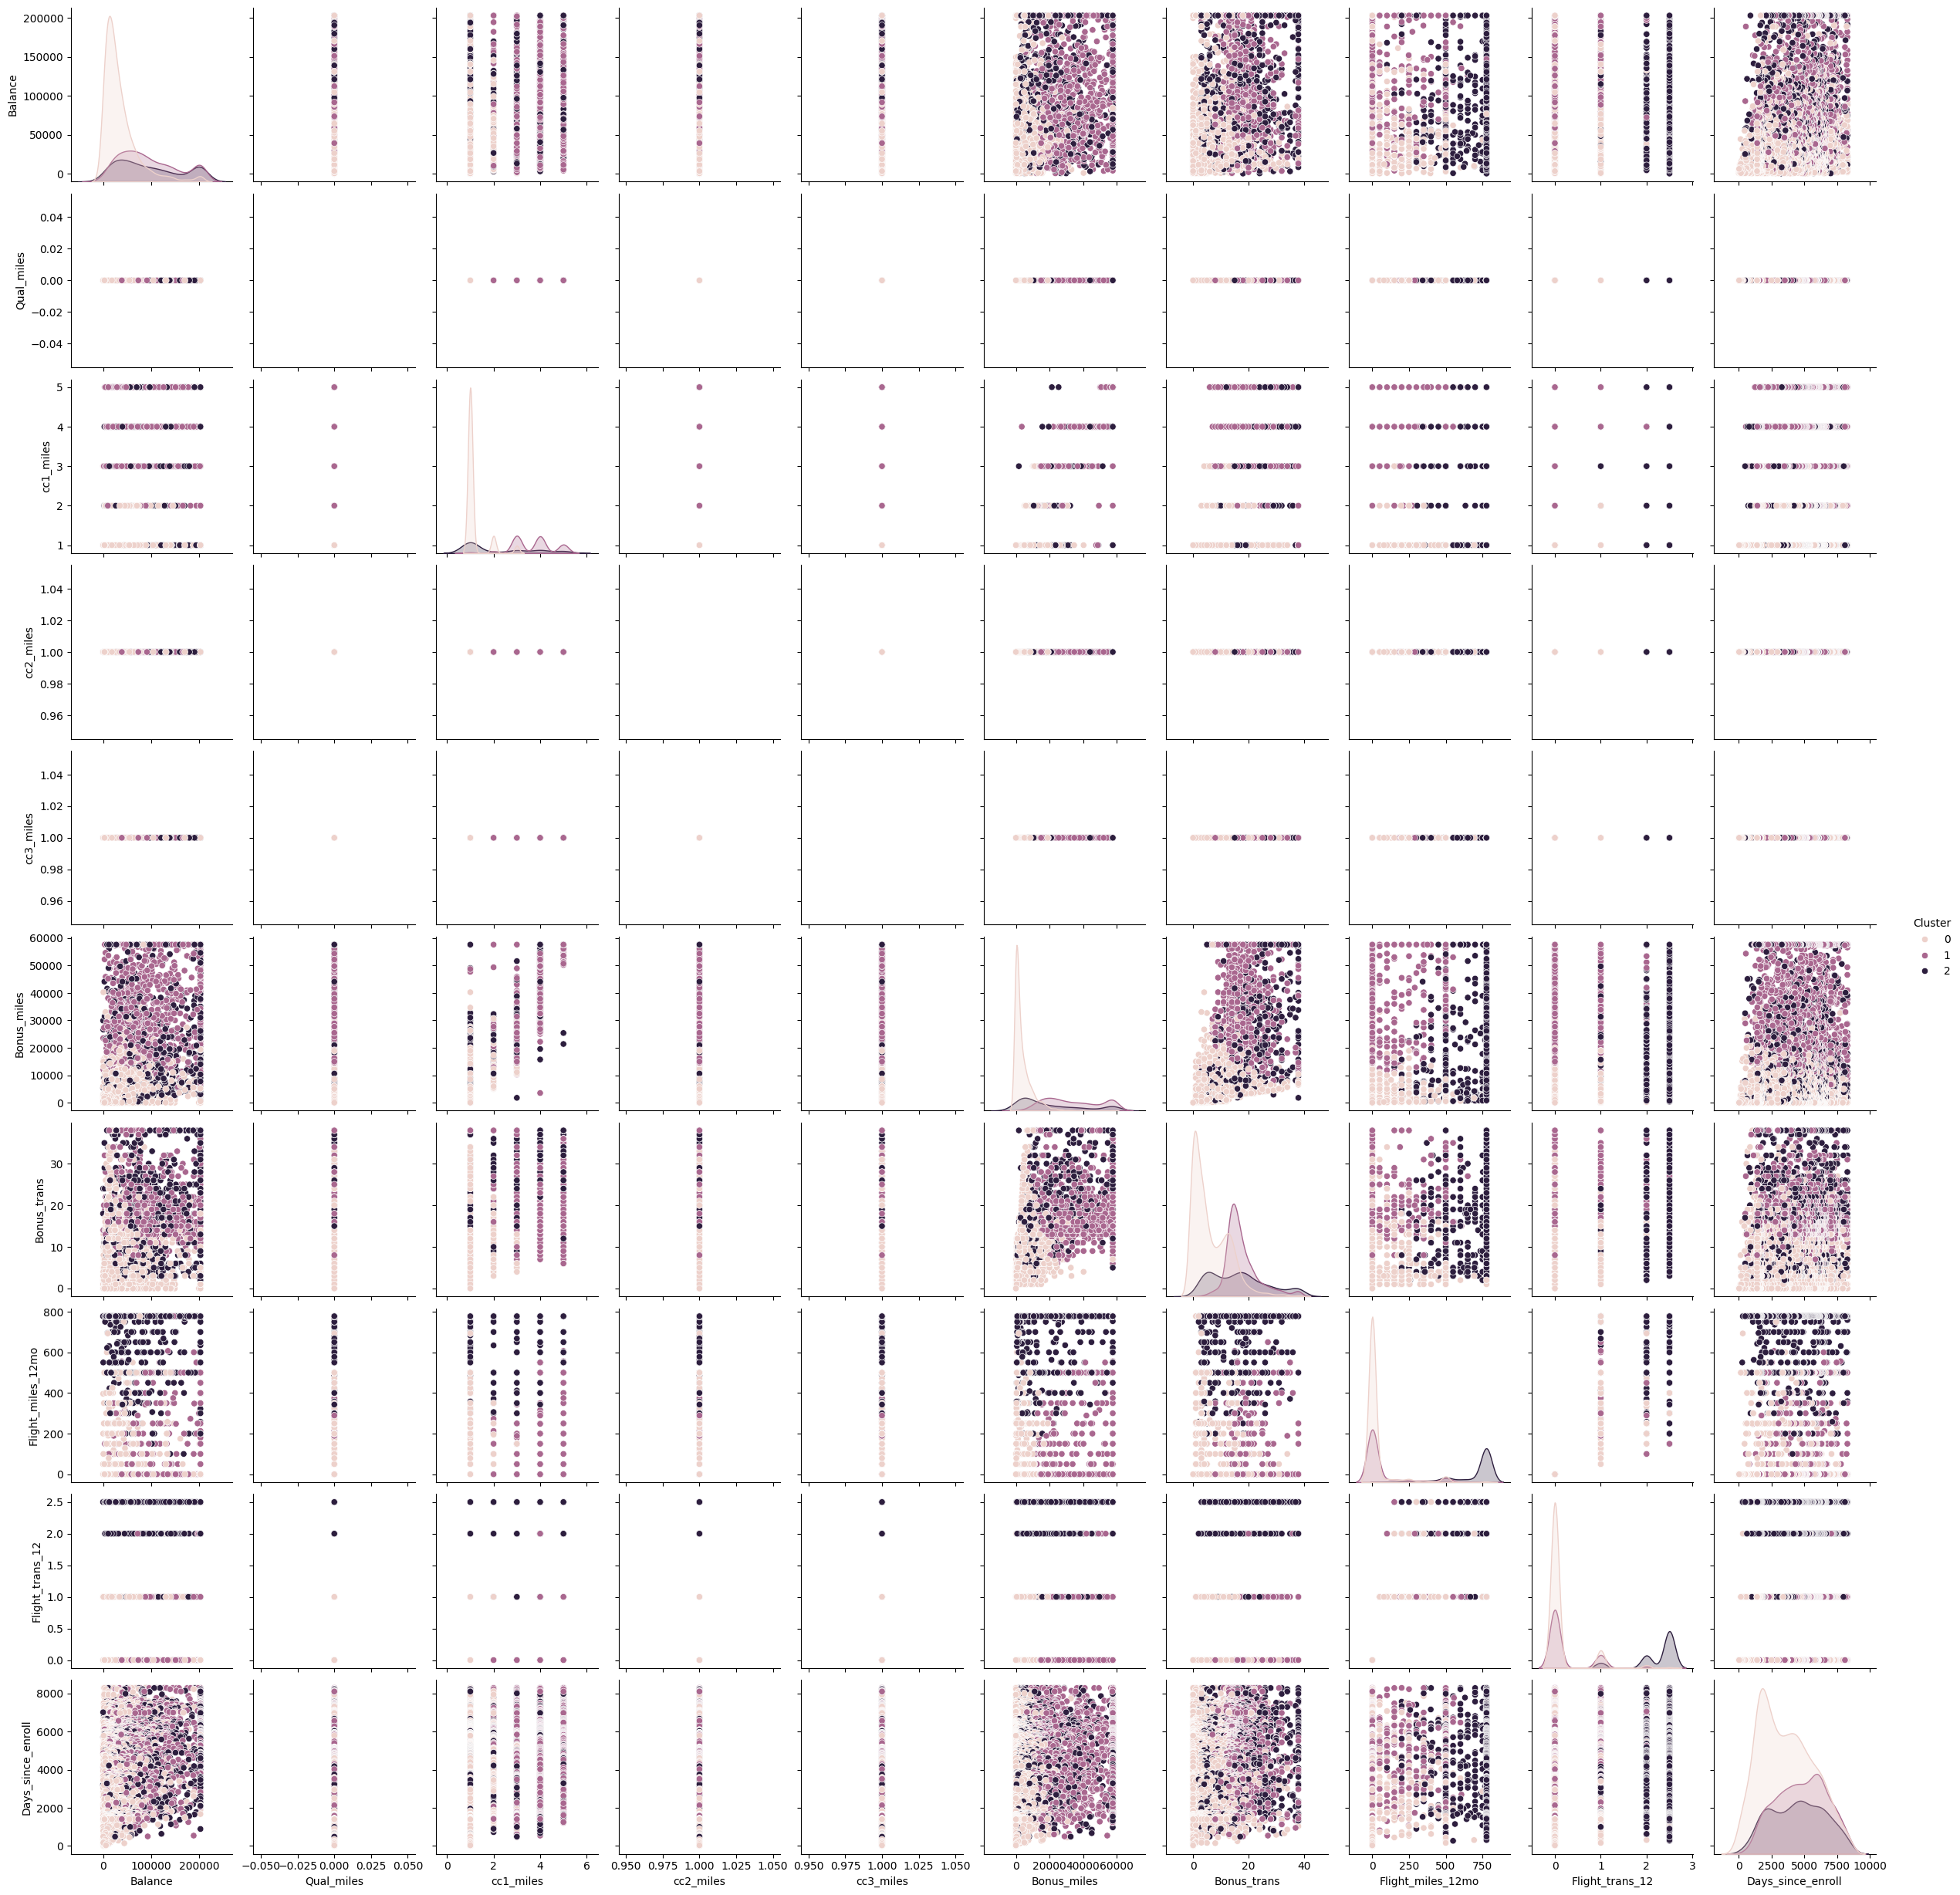

In [29]:
sns.pairplot(df, hue='Cluster', vars=['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll'])
plt.show()

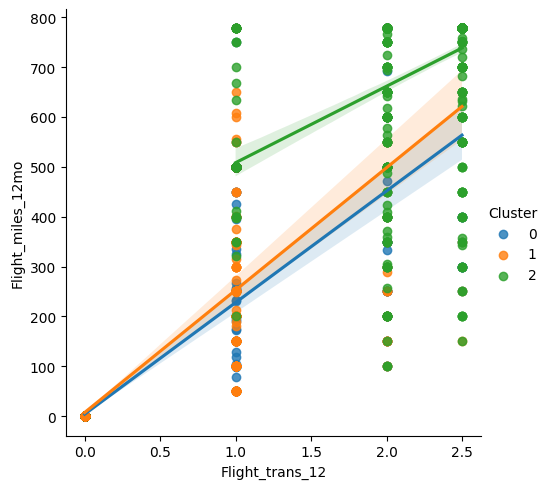

In [30]:
sns.lmplot(data=df, x='Flight_trans_12', y='Flight_miles_12mo', hue='Cluster')
plt.show()

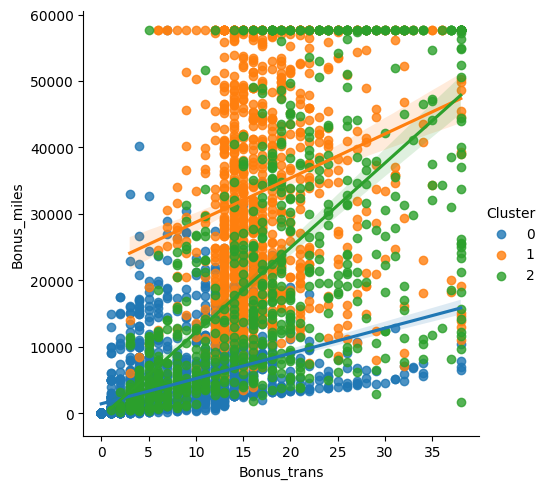

In [31]:
sns.lmplot(data=df, x='Bonus_trans', y='Bonus_miles', hue='Cluster')
plt.show()

In [32]:
silhouette_score(features,cluster.labels_)

0.31005627066812474

Elbow Method


In [33]:
clusters=range(1,11)

In [34]:
inertia=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(features)
  inertia.append(kmeans.inertia_)

In [35]:
inertia

[31991.999999999996,
 22258.714338578764,
 17744.013678676867,
 15870.607290821983,
 13705.178271629024,
 12446.91390379594,
 11413.846101416155,
 11053.153596953141,
 10257.08064524422,
 9660.887913700319]

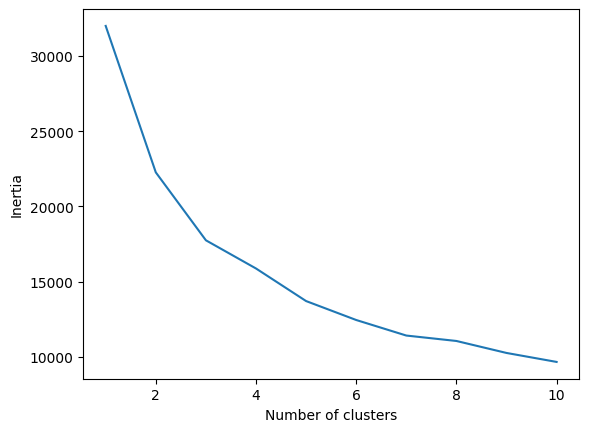

In [36]:
plt.plot(clusters,inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [37]:
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

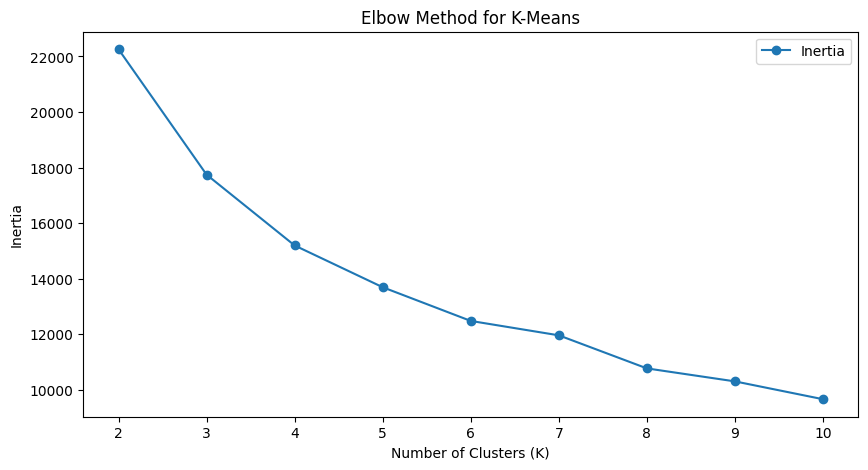

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o', label='Inertia')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.legend()
plt.show()

In [39]:
# K-Means with optimal K
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 to match k_range
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(features)
df['KMeans_Cluster'] = kmeans.labels_

In [40]:
df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1  28143.0           0          1          1          1        174.0   
1    2  19244.0           0          1          1          1        215.0   
2    3  41354.0           0          1          1          1       4123.0   
3    4  14776.0           0          1          1          1        500.0   
4    5  97752.0           0          4          1          1      43300.0   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                0.0              0.0               7000       0   
1            2                0.0              0.0               6968       0   
2            4                0.0              0.0               7034       0   
3            1                0.0              0.0               6952       0   
4           26              777.5              2.5               6935       1   

   Cluster  KMeans_Cluster  
0        0               1  
1        0               1  
2        0               1  
3        0               1  
4        2               2

# Hierarchical Clustering

In [41]:
features


Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    -0.607258         0.0  -0.769578        0.0        0.0    -0.843091   
1    -0.758947         0.0  -0.769578        0.0        0.0    -0.840822   
2    -0.382070         0.0  -0.769578        0.0        0.0    -0.624581   
3    -0.835106         0.0  -0.769578        0.0        0.0    -0.825052   
4     0.579265         0.0   1.409471        0.0        0.0     1.543191   
...        ...         ...        ...        ...        ...          ...   
3994 -0.772038         0.0  -0.769578        0.0        0.0    -0.381007   
3995  0.010506         0.0  -0.769578        0.0        0.0    -0.798437   
3996  0.167530         0.0   0.683121        0.0        0.0     0.555335   
3997 -0.151188         0.0  -0.769578        0.0        0.0    -0.825052   
3998 -1.035562         0.0  -0.769578        0.0        0.0    -0.852718   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0       -1.148854          -0.604313        -0.626143           1.395454   
1       -1.039133          -0.604313        -0.626143           1.379957   
2       -0.819689          -0.604313        -0.626143           1.411920   
3       -1.148854          -0.604313        -0.626143           1.372208   
4        1.594189           2.034489         2.020176           1.363975   
...           ...                ...              ...                ...   
3994    -0.819689           0.074478         0.432384          -1.315120   
3995    -0.709967          -0.604313        -0.626143          -1.318994   
3996    -0.380802          -0.604313        -0.626143          -1.315604   
3997    -1.148854           1.092666         0.432384          -1.316088   
3998    -1.258576          -0.604313        -0.626143          -1.317541   

        Award?  
0    -0.766919  
1    -0.766919  
2    -0.766919  
3    -0.766919  
4     1.303918  
...        ...  
3994  1.303918  
3995  1.303918  
3996  1.303918  
3997 -0.766919  
3998 -0.766919  

[3999 rows x 11 columns]

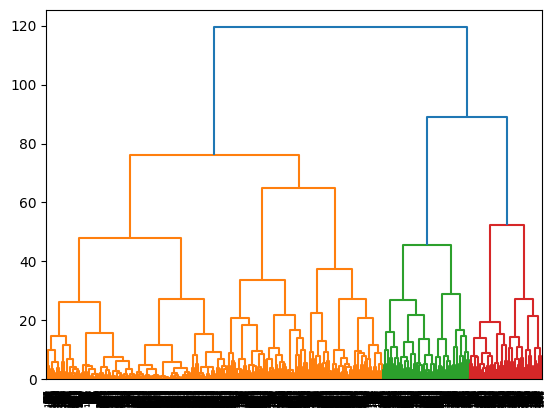

In [42]:
dendrogram=sch.dendrogram(sch.linkage(features,method='ward'))
plt.show()

In [43]:
agg=AgglomerativeClustering(n_clusters=3)
clusters=agg.fit(features)

In [44]:
clusters.labels_

array([0, 0, 0, ..., 0, 2, 0])

In [45]:
df['Agglomerative_Cluster']=clusters.labels_

In [46]:
df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1  28143.0           0          1          1          1        174.0   
1    2  19244.0           0          1          1          1        215.0   
2    3  41354.0           0          1          1          1       4123.0   
3    4  14776.0           0          1          1          1        500.0   
4    5  97752.0           0          4          1          1      43300.0   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                0.0              0.0               7000       0   
1            2                0.0              0.0               6968       0   
2            4                0.0              0.0               7034       0   
3            1                0.0              0.0               6952       0   
4           26              777.5              2.5               6935       1   

   Cluster  KMeans_Cluster  Agglomerative_Cluster  
0        0               1                      0  
1        0               1                      0  
2        0               1                      0  
3        0               1                      0  
4        2               2                      1

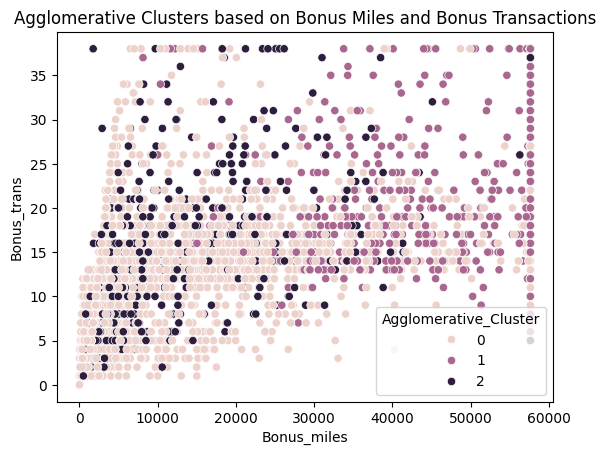

In [47]:
# Scatter plot
sns.scatterplot(data=df, x='Bonus_miles', y='Bonus_trans', hue='Agglomerative_Cluster')
plt.title('Agglomerative Clusters based on Bonus Miles and Bonus Transactions')
plt.show()

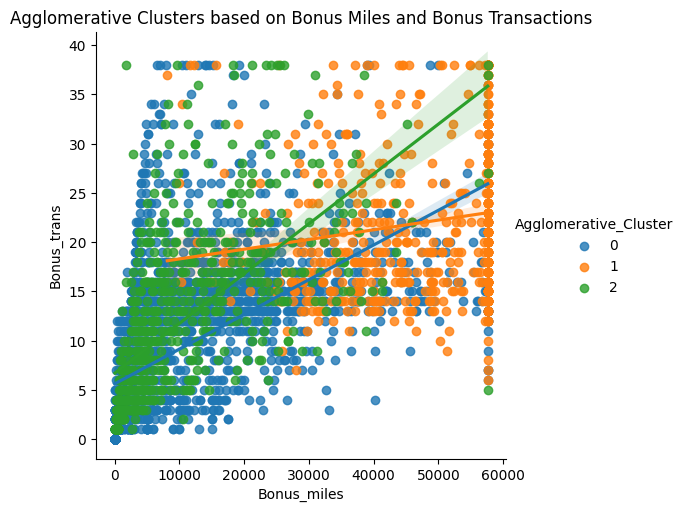

In [48]:
# Scatter plot example
sns.lmplot(data=df, x='Bonus_miles', y='Bonus_trans', hue='Agglomerative_Cluster')
plt.title('Agglomerative Clusters based on Bonus Miles and Bonus Transactions')
plt.show()

# DBSCAN


In [49]:
features

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    -0.607258         0.0  -0.769578        0.0        0.0    -0.843091   
1    -0.758947         0.0  -0.769578        0.0        0.0    -0.840822   
2    -0.382070         0.0  -0.769578        0.0        0.0    -0.624581   
3    -0.835106         0.0  -0.769578        0.0        0.0    -0.825052   
4     0.579265         0.0   1.409471        0.0        0.0     1.543191   
...        ...         ...        ...        ...        ...          ...   
3994 -0.772038         0.0  -0.769578        0.0        0.0    -0.381007   
3995  0.010506         0.0  -0.769578        0.0        0.0    -0.798437   
3996  0.167530         0.0   0.683121        0.0        0.0     0.555335   
3997 -0.151188         0.0  -0.769578        0.0        0.0    -0.825052   
3998 -1.035562         0.0  -0.769578        0.0        0.0    -0.852718   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0       -1.148854          -0.604313        -0.626143           1.395454   
1       -1.039133          -0.604313        -0.626143           1.379957   
2       -0.819689          -0.604313        -0.626143           1.411920   
3       -1.148854          -0.604313        -0.626143           1.372208   
4        1.594189           2.034489         2.020176           1.363975   
...           ...                ...              ...                ...   
3994    -0.819689           0.074478         0.432384          -1.315120   
3995    -0.709967          -0.604313        -0.626143          -1.318994   
3996    -0.380802          -0.604313        -0.626143          -1.315604   
3997    -1.148854           1.092666         0.432384          -1.316088   
3998    -1.258576          -0.604313        -0.626143          -1.317541   

        Award?  
0    -0.766919  
1    -0.766919  
2    -0.766919  
3    -0.766919  
4     1.303918  
...        ...  
3994  1.303918  
3995  1.303918  
3996  1.303918  
3997 -0.766919  
3998 -0.766919  

[3999 rows x 11 columns]

In [50]:
eps=[0.1, 0.3,0.5,0.7,1.0,1.2,1.5,1.8]
min_node=range(1,11)

In [ ]:
output=[]
for i in eps:
  for j in min_node:
    labels=DBSCAN(eps=i,min_samples=j).fit(features).labels_
    score=silhouette_score(features,labels)
    output.append([i,j,score])

In [62]:
output

[[0.1, 1, -0.017285111735458884],
 [0.1, 2, -0.45539373967697333],
 [0.1, 3, -0.31781598594964144],
 [0.1, 4, -0.24327682083599053],
 [0.1, 5, -0.22764758853299857],
 [0.1, 6, -0.1950724954875738],
 [0.1, 7, -0.2019080571485221],
 [0.1, 8, -0.2020597004106827],
 [0.1, 9, -0.2097541806556396],
 [0.1, 10, -0.20913754193595394],
 [0.3, 1, -0.082206707931552],
 [0.3, 2, -0.359426075274148],
 [0.3, 3, -0.41497878445460235],
 [0.3, 4, -0.41996977308923455],
 [0.3, 5, -0.35035425689789385],
 [0.3, 6, -0.322167016670529],
 [0.3, 7, -0.15516372099554732],
 [0.3, 8, -0.17129395187519547],
 [0.3, 9, -0.1532038369695963],
 [0.3, 10, -0.08081005512417376],
 [0.5, 1, -0.10895016545328935],
 [0.5, 2, -0.1884813169442352],
 [0.5, 3, -0.2025652795477887],
 [0.5, 4, -0.19110614827158887],
 [0.5, 5, -0.16625904358673524],
 [0.5, 6, -0.16908209196174],
 [0.5, 7, -0.17959509112761401],
 [0.5, 8, -0.2000291393449653],
 [0.5, 9, -0.19358131114905186],
 [0.5, 10, -0.21372559763549068],
 [0.7, 1, -0.0919978446

In [63]:
a=pd.DataFrame(output)
score=a.iloc[:,2].max()

In [64]:
score

0.22374104391752778

In [65]:
a[a[2]==score]

0  1         2
71  1.8  2  0.223741
72  1.8  3  0.223741
73  1.8  4  0.223741
74  1.8  5  0.223741
75  1.8  6  0.223741
76  1.8  7  0.223741

In [66]:
labels=DBSCAN(eps=1.8,min_samples=2).fit(features).labels_

In [67]:
labels

array([0, 0, 0, ..., 1, 0, 0])

In [68]:
df['DBSCAN_Cluster']=labels

In [69]:
df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1  28143.0           0          1          1          1        174.0   
1    2  19244.0           0          1          1          1        215.0   
2    3  41354.0           0          1          1          1       4123.0   
3    4  14776.0           0          1          1          1        500.0   
4    5  97752.0           0          4          1          1      43300.0   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                0.0              0.0               7000       0   
1            2                0.0              0.0               6968       0   
2            4                0.0              0.0               7034       0   
3            1                0.0              0.0               6952       0   
4           26              777.5              2.5               6935       1   

   Cluster  KMeans_Cluster  Agglomerative_Cluster  DBSCAN_Cluster  
0        0               1                      0               0  
1        0               1                      0               0  
2        0               1                      0               0  
3        0               1                      0               0  
4        2               2                      1               1

<Axes: xlabel='ID#', ylabel='Flight_miles_12mo'>

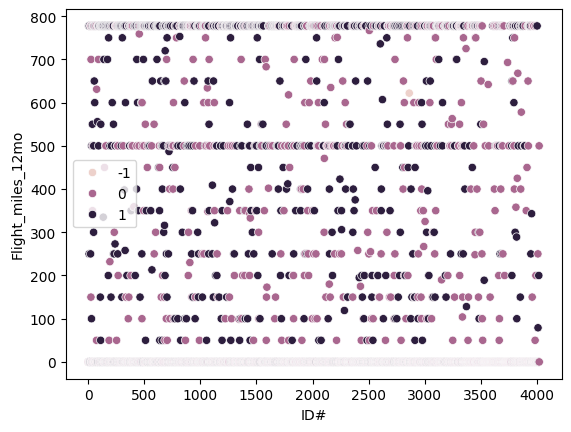

In [70]:
sns.scatterplot(data=df,x='ID#',y='Flight_miles_12mo',hue=labels)

<Axes: xlabel='Bonus_miles', ylabel='Bonus_trans'>

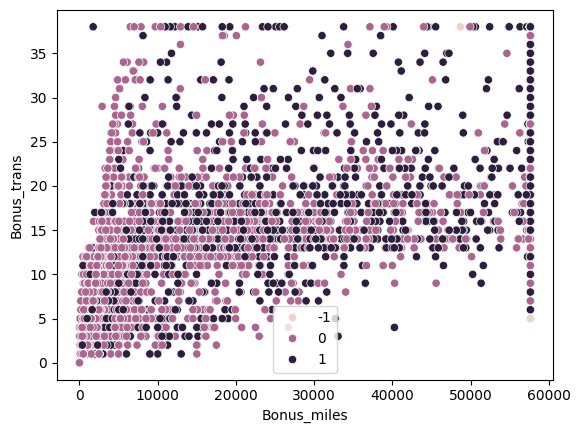

In [71]:
sns.scatterplot(data=df,x='Bonus_miles',y='Bonus_trans',hue=labels)